**Phishing Links Detection Project**

Characters Based

# **Step 1: EDA - Visualization & Statistics**

### **Uploading the data**
*   Importing libraries
*   Google Drive



In [ ]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ensure all columns of the DataFrame are displayed
pd.set_option('display.max_columns', None)
# Set the default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = (12,6)


### **Dataset introduction:**

  * 5 Random data rows table
  * Features types List
  * Basic data statistics table

**5 Random data rows table**

In [ ]:
# Display 5 random rows of the data
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,CLASS_LABEL
3684,3685,2,1,2,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,14,0,0,0,0,1
6038,6039,3,1,2,130,14,0,0,0,0,0,0,0,0,7,1,1,0,0,1,15,108,0,0,0,0,0
1942,1943,2,0,2,39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14,18,0,0,0,0,1
3440,3441,3,2,5,121,5,4,0,0,0,0,0,0,0,20,1,1,0,1,1,66,48,0,0,0,0,1
6063,6064,2,1,5,105,0,0,0,0,7,0,0,0,0,9,1,1,0,0,1,23,75,0,0,0,1,0


**Features types List**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   id                  10000 non-null  int64
 1   NumDots             10000 non-null  int64
 2   SubdomainLevel      10000 non-null  int64
 3   PathLevel           10000 non-null  int64
 4   UrlLength           10000 non-null  int64
 5   NumDash             10000 non-null  int64
 6   NumDashInHostname   10000 non-null  int64
 7   AtSymbol            10000 non-null  int64
 8   TildeSymbol         10000 non-null  int64
 9   NumUnderscore       10000 non-null  int64
 10  NumPercent          10000 non-null  int64
 11  NumQueryComponents  10000 non-null  int64
 12  NumAmpersand        10000 non-null  int64
 13  NumHash             10000 non-null  int64
 14  NumNumericChars     10000 non-null  int64
 15  NoHttps             10000 non-null  int64
 16  RandomString        10000 non-null  int64

**Basic data statistics table**

In [ ]:
#discribe the data
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,23.000000,22.000000,1.000000,111.000000,1.000000,1.00000,1.000000,1.000000,1.000000,137.00000,161.000000,188.000000,1.000000,3.000000,1.000000,1.000000


### **Visualizations**

 *  Labels Distribution Graph
 *  Bar Graph


**Labels Distribution Graph**

axes(x,y) = (CLASS_LABEL,Data Count)

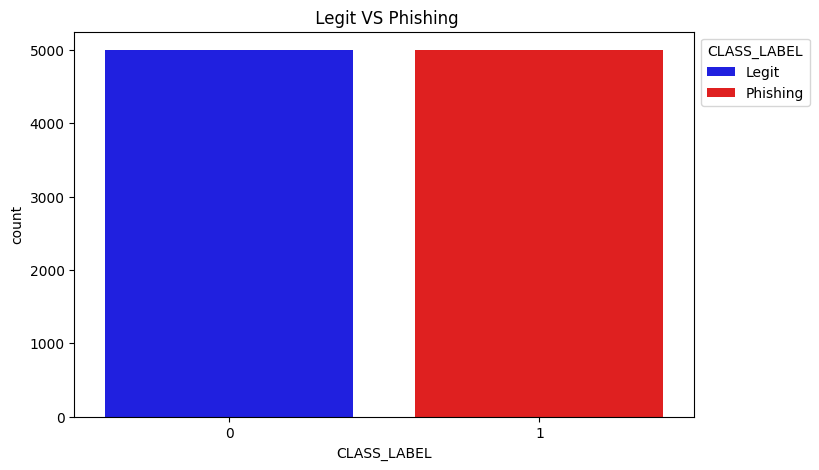

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 5))  # Width: 6, Height: 4

# The plot's title
plt.title(" Legit VS Phishing")

# Create the count plot with customized colors and title
sns.countplot(data=data, x="CLASS_LABEL", hue="CLASS_LABEL", palette={0: 'blue', 1: 'red'})

# Customize the legend
legend_labels = {0: 'Legit', 1: 'Phishing'}
handles, labels = plt.gca().get_legend_handles_labels()
#we add the legend to the plot, and set the location it will be at.
plt.legend(handles, [legend_labels[int(label)] for label in labels], title="CLASS_LABEL", loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

**Bar Graphs**

**prepering the data:**

Our data is made out of 2 types of features : Categorial Features & Binary (boolian) Features

In [ ]:
#trying to create a boolian features list:

features_Bool_List = [col for col in data.columns if sorted(data[col].unique()) == [0, 1]]
features_Cat_List = [col for col in data.columns if col not in features_Bool_List]

# Drop 'id' from the cat list (since it's not relevant)
if 'id' in features_Cat_List:
    features_Cat_List.remove('id')

# Add 'NumHash' to the cat list
features_Cat_List.append('NumHash')

# Drop 'NumHash' and 'CLASS_LABEL' from the binary features list
features_Bool_List.remove('NumHash')
features_Bool_List.remove('CLASS_LABEL')


Printing the lists

In [ ]:
#printing the lists
print("Categorical features:", features_Cat_List)
print("Binary features:", features_Bool_List)

Categorical features: ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumNumericChars', 'HostnameLength', 'PathLength', 'QueryLength', 'NumSensitiveWords', 'NumHash']
Binary features: ['AtSymbol', 'TildeSymbol', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'DoubleSlashInPath', 'EmbeddedBrandName']


**Creating data plots**

`list_To_Plt` Function:

Plots a bar chart comparing how often each feature in the provided `features_list` occurs in two classes (e.g., `CLASS_LABEL == 0` for "Non-Phishing" and `CLASS_LABEL == 1` for "Phishing").

It helps to identify features that show significant differences in occurrence between the two classes.

In [ ]:
# Iterating through the features list
# gets: (features list, plt wanted width & height, the plt title, and descending class_label)
def list_To_Plt(features_list,class_0_counts, class_1_counts, width, height, plt_Title, desc_label=False):
    # Check if the 'CLASS_LABEL' column is in the dataset
    if 'CLASS_LABEL' in data.columns:

      if(class_0_counts==[] and class_0_counts==[]):
        # Aggregate counts grouped by 'CLASS_LABEL'
        class_0_counts = [data[data['CLASS_LABEL'] == 0][feature].sum() for feature in features_list]
        class_1_counts = [data[data['CLASS_LABEL'] == 1][feature].sum() for feature in features_list]

      # Create a DataFrame for sorting
      df_counts = pd.DataFrame({
          'Feature': features_list,
          'Class_0_Count': class_0_counts,
          'Class_1_Count': class_1_counts
      })

      #check:
      print(len(features_list))


      # Sort by 'Class_0_Count' in descending order
      if desc_label==False:
        df_counts = df_counts.sort_values(by='Class_0_Count', ascending=False)
      elif desc_label==True:
        df_counts = df_counts.sort_values(by='Class_1_Count', ascending=True)

      # Get sorted features and counts
      sorted_features_list = df_counts['Feature']
      sorted_class_0_counts = df_counts['Class_0_Count']
      sorted_class_1_counts = df_counts['Class_1_Count']


      # Initialize the plot
      plt.figure(figsize=(width, height))


      # Bar width
      bar_width = 0.15
      index = np.arange(len(sorted_features_list))

      # Plotting
      plt.bar(index, sorted_class_0_counts, bar_width, color='blue', label='Legit')
      plt.bar(index + bar_width, sorted_class_1_counts, bar_width, color='red', label='Phishing')

      # Adding labels, title, and legend
      plt.xlabel('Features')
      plt.ylabel('Count')
      plt.yscale('log')  # Using log scale for better visualization of varying counts
      plt.title(plt_Title)
      plt.xticks(index + bar_width / 2, sorted_features_list, rotation=45)
      plt.legend()

      # Display the plot
      plt.tight_layout()
      plt.show()
    else:
      print("'CLASS_LABEL' column is not in the dataset.")


**Features Count Lists**

dividing to positive and negative for future usage

In [ ]:
#full features list
# Aggregate counts grouped by 'CLASS_LABEL'
class_0_counts_Cat = [data[data['CLASS_LABEL'] == 0][feature].sum() for feature in features_Cat_List]
class_1_counts_Cat = [data[data['CLASS_LABEL'] == 1][feature].sum() for feature in features_Cat_List]

class_0_counts_Bool = [data[data['CLASS_LABEL'] == 0][feature].sum() for feature in features_Bool_List]
class_1_counts_Bool = [data[data['CLASS_LABEL'] == 1][feature].sum() for feature in features_Bool_List]


**Ploting the Lists**

Using the func above

16


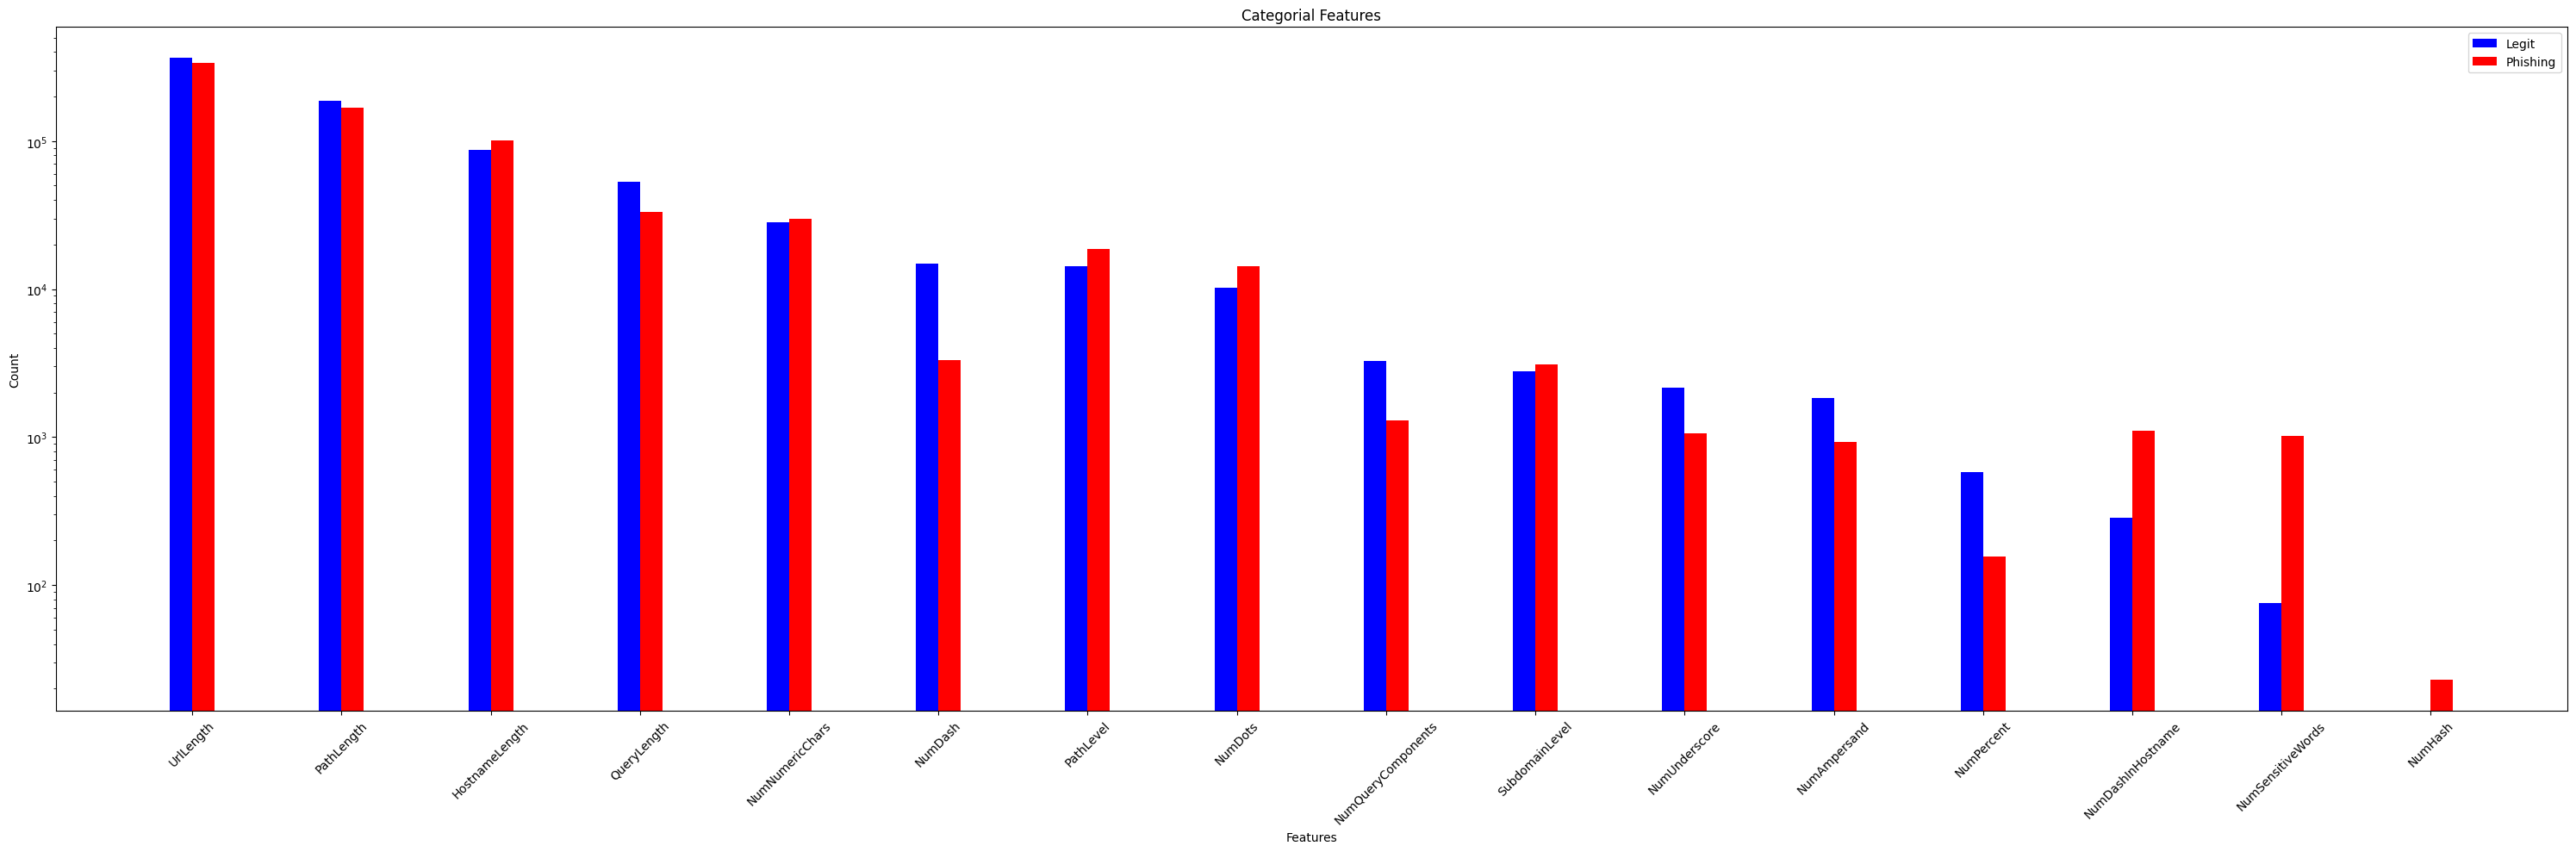

9


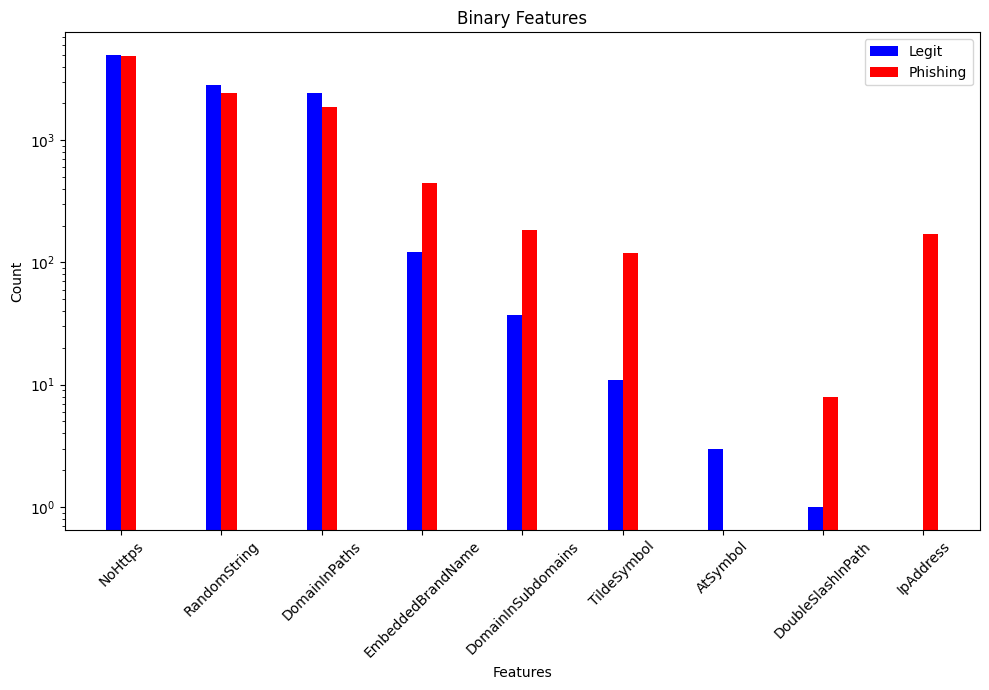

In [ ]:
list_To_Plt(features_Cat_List,class_0_counts_Cat, class_1_counts_Cat, 30, 10, 'Categorial Features')
list_To_Plt(features_Bool_List,class_0_counts_Bool, class_1_counts_Bool, 10,7,'Binary Features')

**distribution of the feature values**

Between the two classes (phishing and legitimate)

Ploting the larged gaped features

`get_feat_w_large_gap` Function:

Identifies features where the ratio of occurrences in one class significantly exceeds the ratio in the other class, based on a specified threshold.


In [ ]:
# def get_feat_w_large_gap(features_list, class_0_counts, class_1_counts, threshold=0.7):
#     large_gap_features = []

#     # Iterate through the counts for both classes
#     for i, feature in enumerate(features_list):
#         total_count = class_0_counts[i] + class_1_counts[i]

#         # Calculate the proportions for each class
#         if total_count > 0:
#             class_0_ratio = class_0_counts[i] / total_count
#             class_1_ratio = class_1_counts[i] / total_count

#             # Check if one class dominates by the threshold (e.g., 70/30)
#             if class_0_ratio >= threshold or class_1_ratio >= threshold:
#                 large_gap_features.append({
#                     'Feature': feature,
#                     'Class_0_Ratio': class_0_ratio,
#                     'Class_1_Ratio': class_1_ratio
#                 })

#     return large_gap_features

def get_feat_w_large_gap(features_list, class_0_counts, class_1_counts, threshold=0.7):
    large_gap_features = []

    # Iterate through the counts for both classes
    for i, feature in enumerate(features_list):
        total_count = class_0_counts[i] + class_1_counts[i]

        # Calculate the proportions for each class
        if total_count > 0:
            class_0_ratio = class_0_counts[i] / total_count
            class_1_ratio = class_1_counts[i] / total_count

            # Check if the absolute difference between the ratios meets the threshold
            if abs(class_0_ratio - class_1_ratio) >= threshold:
                # Append the feature along with the class counts and ratios
                large_gap_features.append({
                    'Feature': feature,
                    'Class_0_Count': class_0_counts[i],
                    'Class_1_Count': class_1_counts[i],
                    'Class_0_Ratio': class_0_ratio,
                    'Class_1_Ratio': class_1_ratio
                })

                # Print the feature, its class counts, and ratios
                print(f"Feature: {feature}")
                print(f"  Class 0 Count: {class_0_counts[i]} | Class 1 Count: {class_1_counts[i]}")
                print(f"  Class 0 Ratio: {class_0_ratio:.2f} | Class 1 Ratio: {class_1_ratio:.2f}")
                print(f"  Absolute Difference: {abs(class_0_ratio - class_1_ratio):.2f}")
                print("-" * 40)  # Separator for readability

    return large_gap_features


**Calling the function above**

Feature: NumSensitiveWords
  Class 0 Count: 76 | Class 1 Count: 1017
  Class 0 Ratio: 0.07 | Class 1 Ratio: 0.93
  Absolute Difference: 0.86
----------------------------------------
Feature: NumHash
  Class 0 Count: 0 | Class 1 Count: 23
  Class 0 Ratio: 0.00 | Class 1 Ratio: 1.00
  Absolute Difference: 1.00
----------------------------------------
Feature: AtSymbol
  Class 0 Count: 3 | Class 1 Count: 0
  Class 0 Ratio: 1.00 | Class 1 Ratio: 0.00
  Absolute Difference: 1.00
----------------------------------------
Feature: TildeSymbol
  Class 0 Count: 11 | Class 1 Count: 120
  Class 0 Ratio: 0.08 | Class 1 Ratio: 0.92
  Absolute Difference: 0.83
----------------------------------------
Feature: IpAddress
  Class 0 Count: 0 | Class 1 Count: 172
  Class 0 Ratio: 0.00 | Class 1 Ratio: 1.00
  Absolute Difference: 1.00
----------------------------------------
Feature: DoubleSlashInPath
  Class 0 Count: 1 | Class 1 Count: 8
  Class 0 Ratio: 0.11 | Class 1 Ratio: 0.89
  Absolute Difference: 0

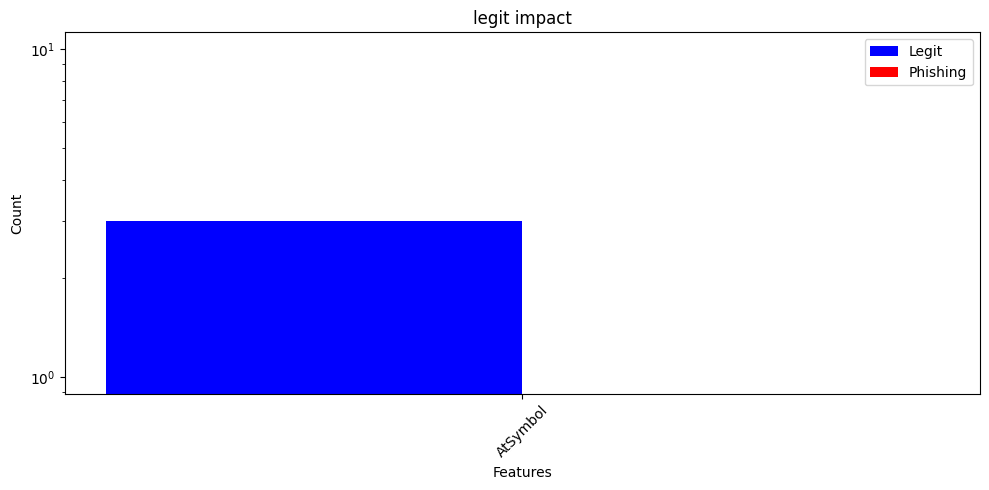

5


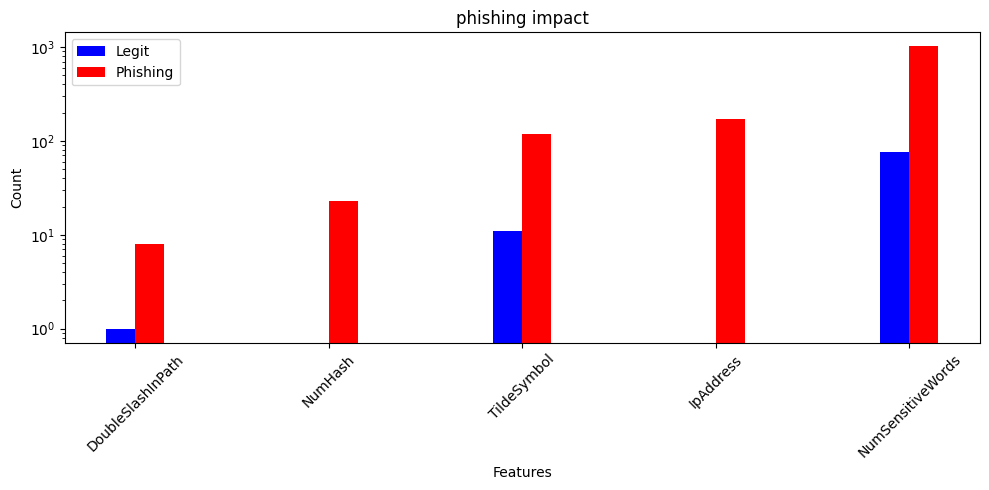

In [ ]:
features_list=features_Cat_List+features_Bool_List
class_0_counts=class_0_counts_Cat+class_0_counts_Bool
class_1_counts=class_1_counts_Cat+class_1_counts_Bool


# Call the new function to get features with large gaps
large_gap_features = get_feat_w_large_gap(features_list, class_0_counts, class_1_counts, 0.7)

# Print the features with large gaps
print("Features with a large gap ({}% or more):".format(int(0.7 * 100)))
for feature in large_gap_features:
    print(f" - {feature['Feature']}: Legit: {feature['Class_0_Ratio']:.2f} VS Phishing: {feature['Class_1_Ratio']:.2f}")

# Creating lists for positive and negative gap features
phishing_Gap_List = [feature['Feature'] for feature in large_gap_features if feature['Class_1_Ratio'] > feature['Class_0_Ratio']]
legit_Gap_List = [feature['Feature'] for feature in large_gap_features if feature['Class_0_Ratio'] > feature['Class_1_Ratio']]

# Print positive and negative gap lists
print("phishing Gap Features (Class 1 > Class 0):", phishing_Gap_List)
print("legit Gap Features (Class 0 > Class 1):", legit_Gap_List)

class_0_counts_phishing=[]
class_1_counts_phishing=[]
class_1_counts_legit=[]
class_0_counts_legit=[]

list_To_Plt(legit_Gap_List,class_0_counts_legit,class_1_counts_legit, 10, 5, 'legit impact', False)
list_To_Plt( phishing_Gap_List,class_0_counts_phishing,class_1_counts_phishing, 10, 5, 'phishing impact', True)


**scatter plot**

Since BAR PLOTS show the overall distribution of the data.

To see outliers, other types of plots like box plots or scatter plots are more appropriate.

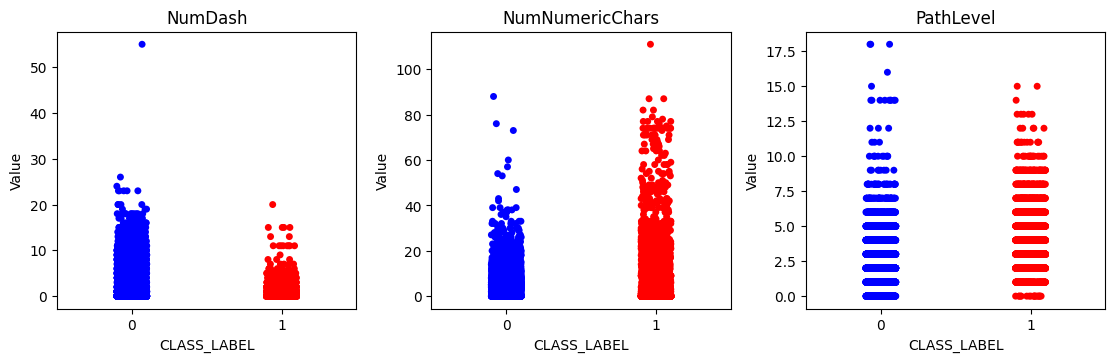

In [ ]:
def plot_strip_plots(features, data, plot_size=(15, 10)):
    plt.figure(figsize=plot_size)

    for i, feature in enumerate(features):
        plt.subplot(3, 4, i + 1)  # Adjust depending on the number of features
        sns.stripplot(
            x='CLASS_LABEL', y=feature, data=data,
            hue='CLASS_LABEL', palette={0: 'blue', 1: 'red'}, dodge=False, jitter=0.1, legend=False
        )
        plt.title(f'{feature}')
        plt.ylabel('Value')
        plt.xlabel('CLASS_LABEL')
        plt.xticks([0, 1], ['0', '1'])

    plt.tight_layout()
    plt.show()

list_importance=['NumDash','NumNumericChars','PathLevel']
plot_strip_plots(list_importance, data)
# plot_strip_plots(phishing_Gap_List, data)


**Feature range appearance**
showing the graph for a specific feature, for every dataset instance.

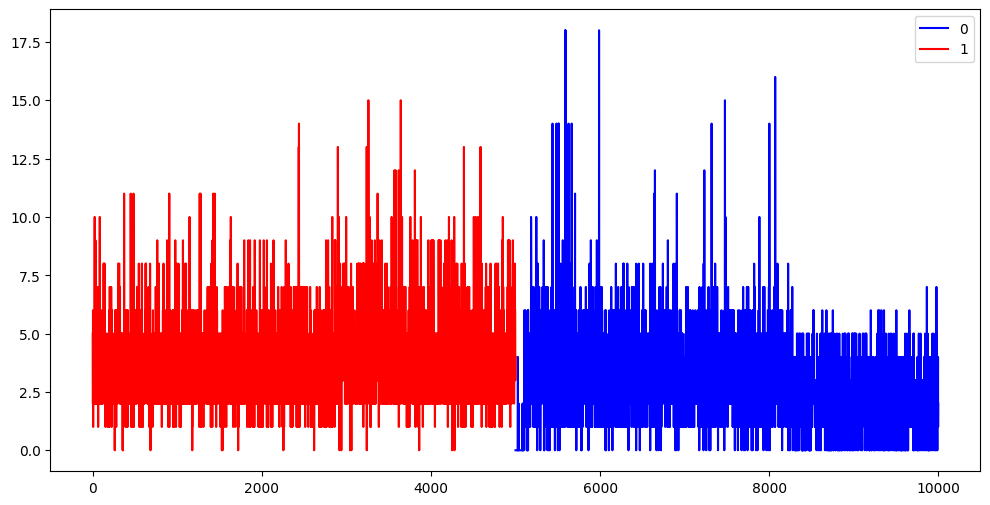

In [ ]:
#data.groupby("CLASS_LABEL")["PathLevel"].plot()
colors = ['blue', 'red']  # Define the colors for the groups
for (label, group), color in zip(data.groupby("CLASS_LABEL"), colors):
    group["PathLevel"].plot(label=label, color=color)

plt.legend()  # Add a legend to distinguish between the groups
plt.show()

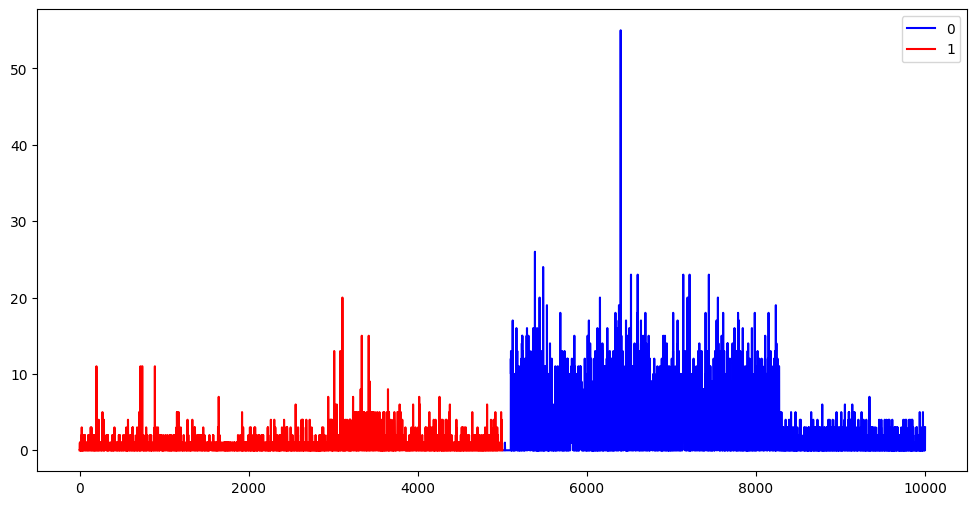

In [ ]:
#data.groupby("CLASS_LABEL")["NumDash"].plot(color='red', color='blue')
colors = ['blue', 'red']  # Define the colors for the groups
for (label, group), color in zip(data.groupby("CLASS_LABEL"), colors):
    group["NumDash"].plot(label=label, color=color)

plt.legend()  # Add a legend to distinguish between the groups
plt.show()



doing some kind of strip & scatter, to see: frequesncy, label, value

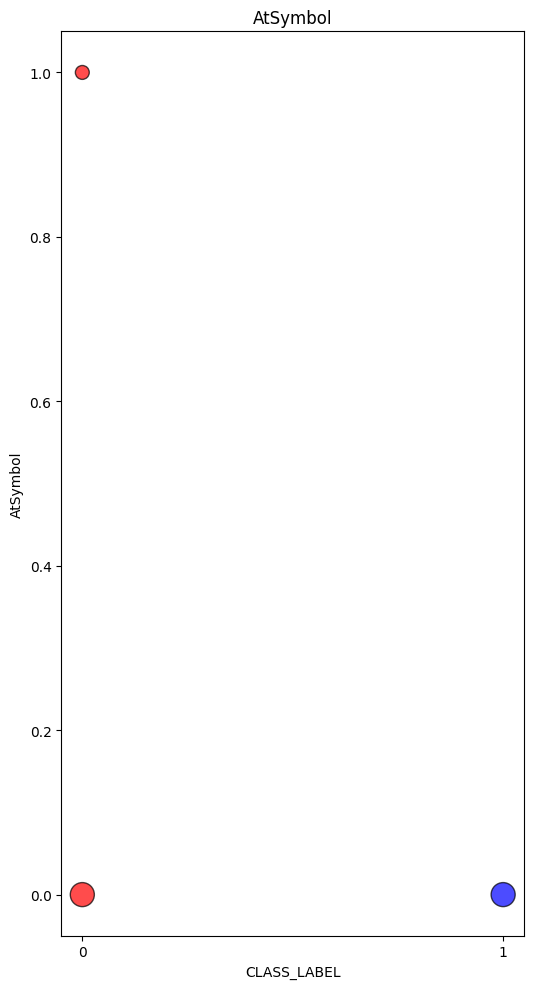

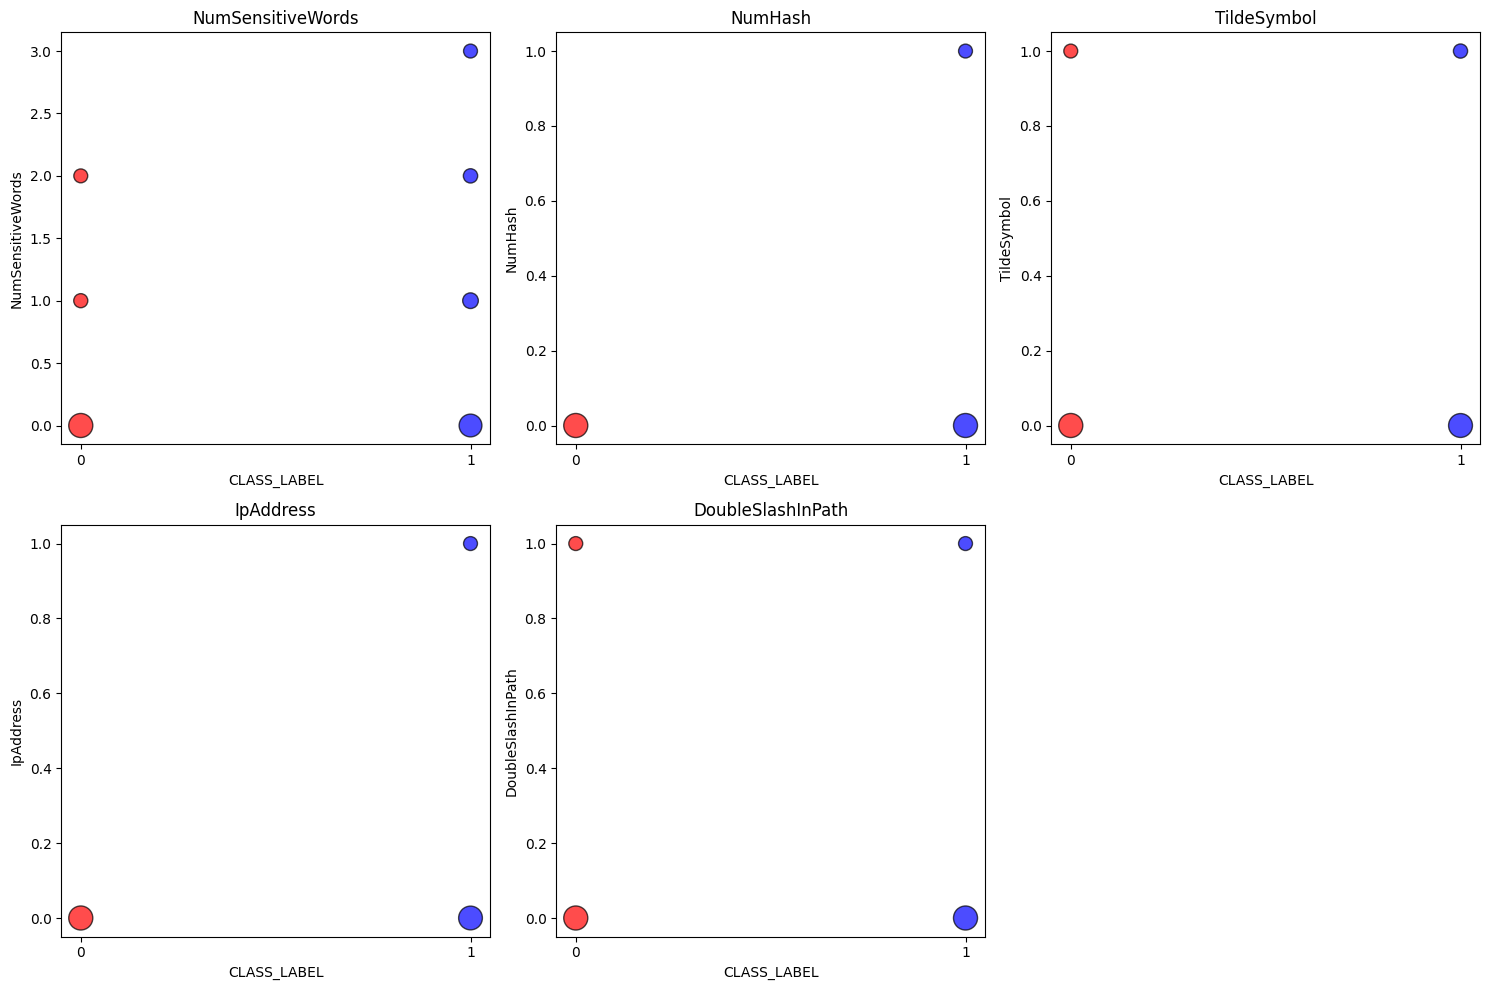

In [ ]:
def plot_scatter_with_frequency(features, data, plot_size=(15, 10), border_size=1):
    # Calculate the number of rows and columns needed
    num_features = len(features)
    cols = 3
    rows = int(np.ceil(num_features / cols))

    plt.figure(figsize=plot_size)

    for i, feature in enumerate(features):
        plt.subplot(rows, cols, i + 1)

        # Calculate the frequency of each value for each class
        frequency_data = data.groupby(['CLASS_LABEL', feature]).size().reset_index(name='Frequency')

        # Apply square root transformation to the Frequency to make size variations more visible
        frequency_data['Transformed_Frequency'] = np.sqrt(frequency_data['Frequency'])

        # Plot scatter plot with varying sizes
        sns.scatterplot(
            x='CLASS_LABEL', y=feature, size='Frequency', sizes=(100, 300),  # Adjust 'sizes' range as needed
            hue='CLASS_LABEL', data=frequency_data,
            palette={0: 'red', 1: 'blue'}, legend=False,
            edgecolor='black', linewidth=border_size, alpha=0.7
        )

        plt.title(f'{feature}')
        plt.ylabel(feature)
        plt.xlabel('CLASS_LABEL')
        plt.xticks([0, 1], ['0', '1'])

    plt.tight_layout()
    plt.show()

# Call the plotting function with frequency-based dot sizes
plot_scatter_with_frequency(legit_Gap_List, data, border_size=1)
plot_scatter_with_frequency(phishing_Gap_List, data, border_size=1)


**Multicollinearity**

Multicollinearity occurs when two or more features in your dataset are highly correlated with each other.

In other words, *they provide redundant information about the same underlying concept.*

**we want to evoid**
1. Features redundancy
2. Model interpretation
3. Model's instability

**Lets look for them using the spearman correlation.**

while doing the spearman correlation

we need to remebder that we stiil dont know whether the data is linear or not,

(which is important for the visualizations and most importantly - the model we will eventually use to train the data with.)

**Spearman Correlation**

In [ ]:
# corr_matrix = data.corr(method='spearman')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f, vmin=-1, vmax=1)
# plt.title('Spearman Correlation Matrix')
# plt.show()


def corr_heatmap(data, idx_s, idx_e):
    y = data['CLASS_LABEL']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']

    temp['CLASS_LABEL'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()


<ipython-input-18-92693ba6ceb7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['CLASS_LABEL'] = y


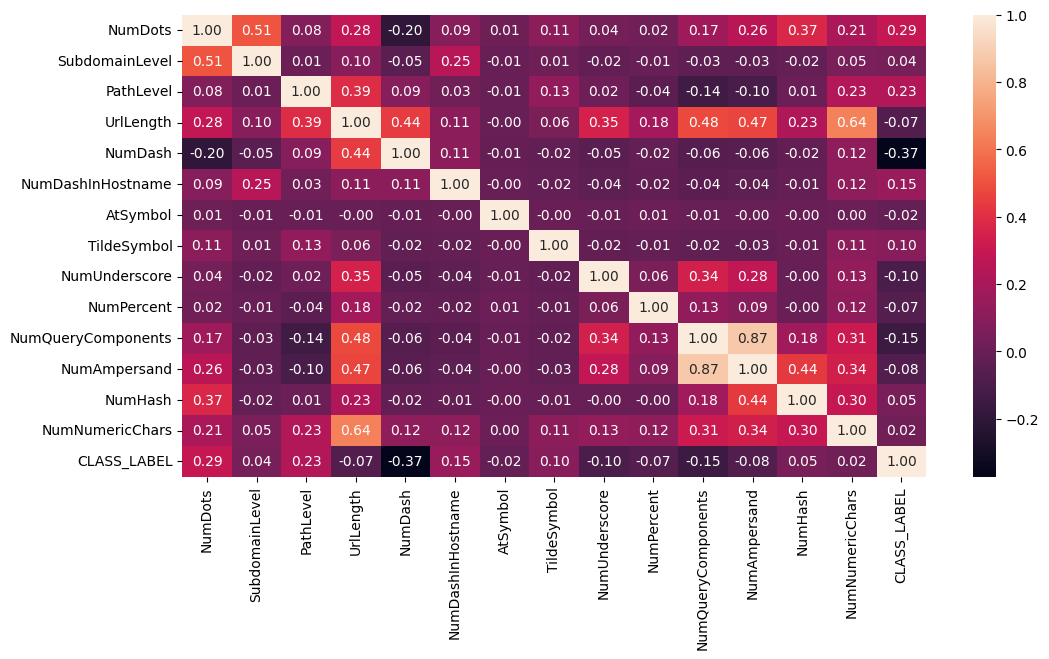

In [ ]:
corr_heatmap(data, 1, 15)

**Strength of Correlation**

0.0 -> +-0.1 : Negligible correlation

+-0.1 -> +-0.3 : Weak correlation

+-0.3 -> +-0.5 : Moderate correlation

+-0.5 -> +-1.0 : Strong correlation

**the ideas behind it:
we check for the increase \ decreas of a value, and compare it to all of the other features.**

**From the visualization we see that:**

1-15

there is a strong overall corelation between:**positive**

1: **STRONGEST**: NumQueryComponents VS NumAmpersand *(0.87)*

2: **second**: UrlLength VS NumNumericChars *(0.64)*

3: **third**: SubDomainLevel VS NumDots *(0.51)*

Lets do the same for 16-31

<ipython-input-18-92693ba6ceb7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['CLASS_LABEL'] = y


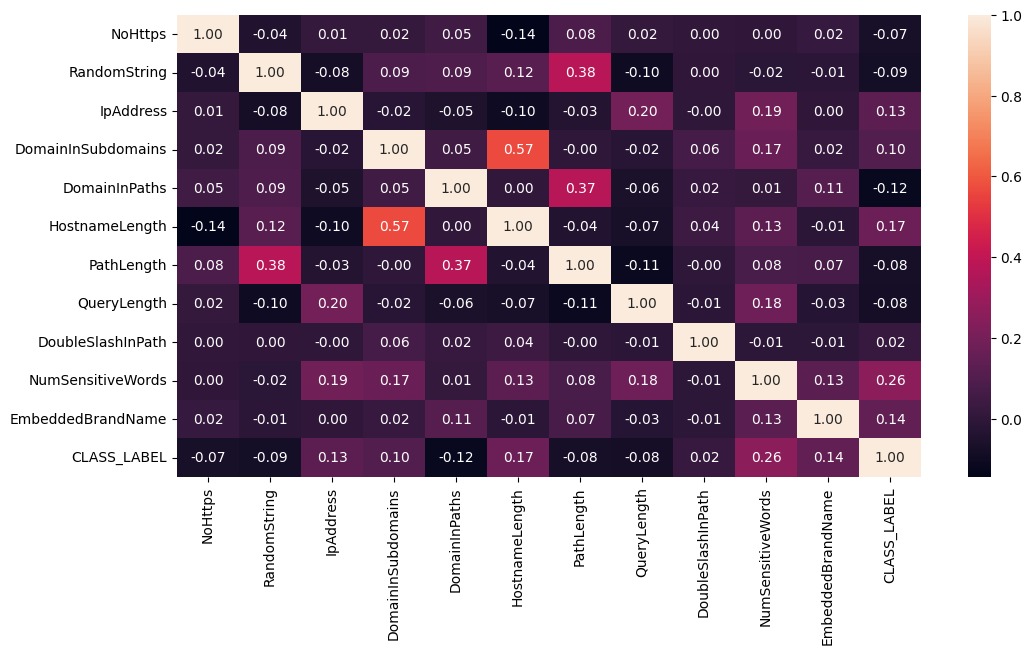

In [ ]:
corr_heatmap(data, 15, 29)

**From the visualization we see that:**

15-31

there is a strong overall corelation between:**Positive**

1: **STRONGEST**: DomainsInSubDomians VS HostNameLength *(0.57)*

there is a strong overall corelation between:**Negative**

1: **STRONGEST**:

SubdomainLevelRT VS DomainsInSubDomains *(-0.70)*

2: second: PathLength VS UrlLengthRT *(-0.67)*

3: third: SubDomainLevelRT VS HostNameLength *(-0.53)*

### Catboost Model

we chose CATBOOST model because of it's good ability to handle categorial features, like like in this case.

In [ ]:
#installing
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
#importing
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Import accuracy_score from sklearn


**CatBoostClassifier:** A gradient boosting model that handles categorical features automatically, which makes it very effective for structured data.

**metrics:** Provides tools for evaluating model performance.

**accuracy_score:** A function from scikit-learn to calculate the accuracy of the model's predictions.

### Data Splitting
Let's split the train data into training and validation sets.

In [ ]:
# Dividing the Data into Features (X) and Labels (y)
x = data.drop(['id', 'CLASS_LABEL'], axis=1)
y = data['CLASS_LABEL']

**X:** The features dataset, created by dropping the id (irrelevant) and CLASS_LABEL (target variable) columns.

**y:** The target variable (labels) extracted from the CLASS_LABEL column.

In [ ]:
#Splitting the Data into Training and Validation Sets
from sklearn.model_selection import train_test_split

In [ ]:
# First, split off a test set
x_preTrain, x_test, y_preTrain, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Next, split the training+validation set into training and validation subsets
x_train, x_validation, y_train,y_validation = train_test_split(x_preTrain, y_preTrain, train_size=0.75, random_state=42)


**train_test_split:** This function splits your data into training and validation sets.

**X_train and y_train:** 75% of the data, used for training the model.

**X_validation and y_validation:** 25% of the data, used for validating the model's performance.

**random_state=42:** Ensures reproducibility by making the split deterministic.

### Model Training
Creating the model:

starting with the default parameters, as they provide good baseline almost all the time.

The only thing we would like to specify here is `custom_loss` parameter, as this would give us an ability to see what's going on in terms of this competition metric - accuracy, as well as to be able to watch for logloss, as it would be more smooth on dataset of such size.

In [ ]:
#ep 1
# model = CatBoostClassifier(
#     custom_loss=[metrics.Accuracy()],
#     random_seed=42,
#     logging_level='Silent'
#)


#ep 2
# model = CatBoostClassifier(
#     custom_loss=[metrics.Accuracy()],
#     random_seed=42,
#     logging_level='Verbose',
#     learning_rate=0.01,
#     iterations=1000
# )

#try 3
# Initialize the CatBoost model with reasonable default parameters
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Verbose',  # To see the training process
    learning_rate=0.05,       # Default initial learning rate
    iterations=500,           # Increase the number of iterations for better training
    depth=6,                  # Set tree depth to avoid overfitting
    eval_metric='Accuracy'
)

**CatBoostClassifier:** Initializes the CatBoost model for classification.

**custom_loss=[metrics.Accuracy()]:** Specifies accuracy as an additional custom loss metric to monitor during training.

**random_seed=42:** Ensures reproducibility by fixing the random seed.

**logging_level='Silent':** Suppresses training output, though this is later overridden to 'Verbose' in the fit method.

**try 1:**

final result 0.2, starting at 0.5 and quickly degrading to 0.2, 1000 default itterations


**try 2:**
starting strong with 0.6, going down to 0.5-0.4,

from iteration 200: going down to 0.2, anding in 0.2217518092

suggest there was a starting some patterns capture:

**overffiting:** where it memorizes the noise and specificities of
the training set but loses generalization ability.

**try 3:**

best result : 0.9188 !

In [ ]:

categorical_features_indices = np.where(x.dtypes != float)[0]
model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_validation, y_validation),
    #early_stopping_rounds=100,  # Stop if validation doesn't improve for 100 rounds
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8118333	test: 0.8220000	best: 0.8220000 (0)	total: 85.2ms	remaining: 42.5s
1:	learn: 0.8135000	test: 0.8215000	best: 0.8220000 (0)	total: 117ms	remaining: 29s
2:	learn: 0.8181667	test: 0.8260000	best: 0.8260000 (2)	total: 144ms	remaining: 23.9s
3:	learn: 0.8208333	test: 0.8340000	best: 0.8340000 (3)	total: 174ms	remaining: 21.6s
4:	learn: 0.8243333	test: 0.8355000	best: 0.8355000 (4)	total: 209ms	remaining: 20.7s
5:	learn: 0.8266667	test: 0.8400000	best: 0.8400000 (5)	total: 238ms	remaining: 19.6s
6:	learn: 0.8315000	test: 0.8455000	best: 0.8455000 (6)	total: 274ms	remaining: 19.3s
7:	learn: 0.8396667	test: 0.8510000	best: 0.8510000 (7)	total: 321ms	remaining: 19.8s
8:	learn: 0.8396667	test: 0.8520000	best: 0.8520000 (8)	total: 353ms	remaining: 19.2s
9:	learn: 0.8421667	test: 0.8515000	best: 0.8520000 (8)	total: 383ms	remaining: 18.8s
10:	learn: 0.8460000	test: 0.8535000	best: 0.8535000 (10)	total: 414ms	remaining: 18.4s
11:	learn: 0.8468333	test: 0.8540000	best: 0.8540000 

Model Evaluations on test set

In [ ]:
#Model evaluation on validation set
preds = model.predict(x_test)
accuracy = accuracy_score(y_test, preds)

print(f"Testing Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9125


**Feature Imprtance**

which of te features influenced the training result:

               Feature  Importance
2            PathLevel   13.491561
13     NumNumericChars   12.990946
4              NumDash   12.820071
0              NumDots    8.963832
23   NumSensitiveWords    6.684455
1       SubdomainLevel    6.385134
20          PathLength    5.657447
5    NumDashInHostname    4.782861
10  NumQueryComponents    4.666560
8        NumUnderscore    3.723099
19      HostnameLength    3.526120
3            UrlLength    3.241676
21         QueryLength    2.924159
18       DomainInPaths    2.220642
9           NumPercent    1.841487
11        NumAmpersand    1.817958
15        RandomString    1.234065
16           IpAddress    1.063497
14             NoHttps    0.853599
24   EmbeddedBrandName    0.785708
6             AtSymbol    0.299464
7          TildeSymbol    0.012905
17  DomainInSubdomains    0.009795
12             NumHash    0.002637
22   DoubleSlashInPath    0.000321


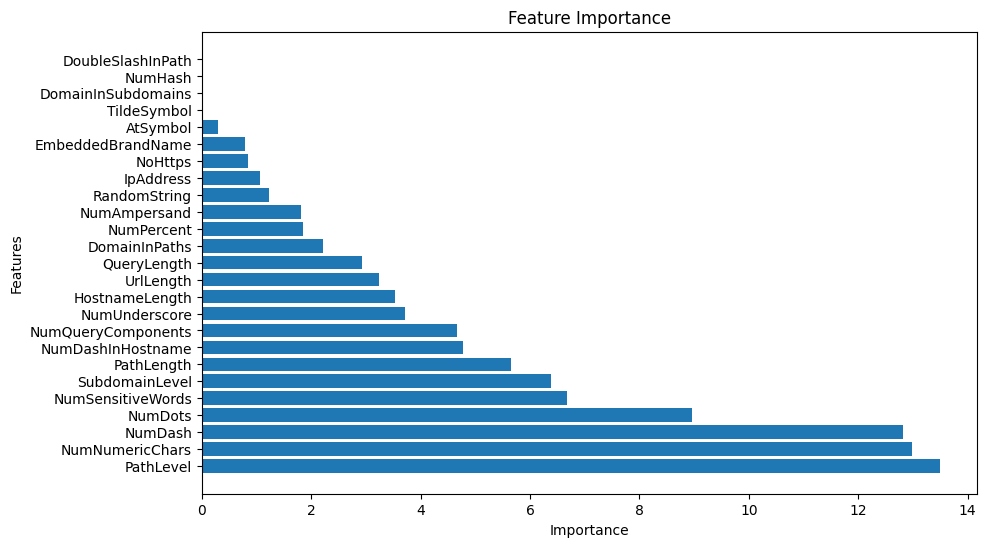

In [ ]:
# Check feature importance
feature_importance = model.get_feature_importance()
feature_names = x_train.columns

# Create a DataFrame to display the feature names with their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print top features
print(importance_df)

# Optionally plot the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()



### Model Cross-Validation

In [ ]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(x_preTrain, y_preTrain, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 0.8092648	test: 0.8047226	best: 0.8047226 (0)	total: 34.3ms	remaining: 17.1s
1:	learn: 0.8192048	test: 0.8103448	best: 0.8103448 (1)	total: 66.4ms	remaining: 16.5s
2:	learn: 0.8298950	test: 0.8155922	best: 0.8155922 (2)	total: 98.9ms	remaining: 16.4s
3:	learn: 0.8315829	test: 0.8178411	best: 0.8178411 (3)	total: 127ms	remaining: 15.8s
4:	learn: 0.8312078	test: 0.8152174	best: 0.8178411 (3)	total: 157ms	remaining: 15.6s
5:	learn: 0.8349587	test: 0.8200900	best: 0.8200900 (5)	total: 195ms	remaining: 16.1s
6:	learn: 0.8362716	test: 0.8212144	best: 0.8212144 (6)	total: 228ms	remaining: 16s
7:	learn: 0.8358965	test: 0.8227136	best: 0.8227136 (7)	total: 256ms	remaining: 15.7s
8:	learn: 0.8383346	test: 0.8249625	best: 0.8249625 (8)	total: 283ms	remaining: 15.5s
9:	learn: 0.8375844	test: 0.8264618	best: 0.8264618 (9)	total: 314ms	remaining: 15.4s
10:	learn: 0.8400225	test: 0.8309595	best: 0.8309595 (10)	total: 342ms	remaining: 15.2s
11:	learn: 0.8394599	test: 0

Now we have values of our loss functions at each boosting step averaged by 3 folds, which should provide us with a more accurate estimation of our model performance:

In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 0.90±0.00 on step 499


In [ ]:
print('Precise validation accuracy score: {:.2f}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.90


### Precision, Recall, Accuracy

In [ ]:
#importing
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

making predictions

In [ ]:
# Get predictions for the validation set
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (phishing)


evaluate

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test,y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9125
Precision: 0.8967
Recall: 0.9348
F1-Score: 0.9153


### Important Features Training

In [ ]:
top_10_features = importance_df.head(10)
print(top_10_features)

               Feature  Importance
2            PathLevel   13.491561
13     NumNumericChars   12.990946
4              NumDash   12.820071
0              NumDots    8.963832
23   NumSensitiveWords    6.684455
1       SubdomainLevel    6.385134
20          PathLength    5.657447
5    NumDashInHostname    4.782861
10  NumQueryComponents    4.666560
8        NumUnderscore    3.723099


In [ ]:
top_10_features = importance_df.head(10)["Feature"]
print(top_10_features)

top_features= top_10_features.values

# 2. Filter the original x DataFrame to include only the top 10 features
x_top_10 = x[top_features]
x_top_10.sample(5)

# 3. Now x_top_10 contains only the top 10 most important features
# You can use the same y (target) as before for training
y = data['CLASS_LABEL']  # Assuming this is still the correct target column

print(top_features)

2              PathLevel
13       NumNumericChars
4                NumDash
0                NumDots
23     NumSensitiveWords
1         SubdomainLevel
20            PathLength
5      NumDashInHostname
10    NumQueryComponents
8          NumUnderscore
Name: Feature, dtype: object
['PathLevel' 'NumNumericChars' 'NumDash' 'NumDots' 'NumSensitiveWords'
 'SubdomainLevel' 'PathLength' 'NumDashInHostname' 'NumQueryComponents'
 'NumUnderscore']


Spliting the data

In [ ]:
# First, split off a test set
xt_preTrain, xt_test, yt_preTrain, yt_test = train_test_split(x_top_10, y, test_size=0.2, random_state=42)

# Next, split the training+validation set into training and validation subsets
xt_train, xt_validation, yt_train,yt_validation = train_test_split(xt_preTrain, yt_preTrain, train_size=0.75, random_state=42)


Model Training

In [ ]:
tFeatures = np.where(x_top_10.dtypes != float)[0]
model.fit(
    xt_train, yt_train,
    cat_features=tFeatures,
    eval_set=(xt_validation, yt_validation),
    #early_stopping_rounds=100,  # Stop if validation doesn't improve for 100 rounds
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8116667	test: 0.8210000	best: 0.8210000 (0)	total: 22.5ms	remaining: 11.2s
1:	learn: 0.8131667	test: 0.8275000	best: 0.8275000 (1)	total: 41.5ms	remaining: 10.3s
2:	learn: 0.8223333	test: 0.8430000	best: 0.8430000 (2)	total: 56.6ms	remaining: 9.38s
3:	learn: 0.8225000	test: 0.8415000	best: 0.8430000 (2)	total: 73.1ms	remaining: 9.06s
4:	learn: 0.8308333	test: 0.8495000	best: 0.8495000 (4)	total: 93.4ms	remaining: 9.25s
5:	learn: 0.8335000	test: 0.8510000	best: 0.8510000 (5)	total: 110ms	remaining: 9.05s
6:	learn: 0.8380000	test: 0.8580000	best: 0.8580000 (6)	total: 125ms	remaining: 8.8s
7:	learn: 0.8360000	test: 0.8550000	best: 0.8580000 (6)	total: 141ms	remaining: 8.69s
8:	learn: 0.8358333	test: 0.8555000	best: 0.8580000 (6)	total: 162ms	remaining: 8.81s
9:	learn: 0.8348333	test: 0.8575000	best: 0.8580000 (6)	total: 181ms	remaining: 8.88s
10:	learn: 0.8343333	test: 0.8545000	best: 0.8580000 (6)	total: 199ms	remaining: 8.85s
11:	learn: 0.8395000	test: 0.8605000	best: 0.8605

Testing the test set

In [ ]:
#Model evaluation on validation set
preds = model.predict(xt_test)
accuracy = accuracy_score(yt_test, preds)

print(f"Testing Accuracy: {accuracy:.4f}")

Testing Accuracy: 0.9005


Accuracy , precision and recall

In [ ]:
# Get predictions for the validation set
yt_pred = model.predict(xt_test)
yt_pred_proba = model.predict_proba(xt_test)[:, 1]  # Probabilities for the positive class (phishing)


In [ ]:
# Accuracy
accuracyT = accuracy_score(yt_test, yt_pred)
print(f"Accuracy: {accuracyT:.4f}")

# Precision
precisionT = precision_score(yt_test, yt_pred)
print(f"Precision: {precisionT:.4f}")

# Recall
recallT = recall_score(yt_test,yt_pred)
print(f"Recall: {recallT:.4f}")

# F1-Score
f1T = f1_score(yt_test, yt_pred)
print(f"F1-Score: {f1T:.4f}")

Accuracy: 0.9005
Precision: 0.8831
Recall: 0.9259
F1-Score: 0.9040


              Feature  Importance
2             NumDash   16.170766
0           PathLevel   16.023830
1     NumNumericChars   12.954636
3             NumDots   10.693186
6          PathLength    9.956313
8  NumQueryComponents    8.176184
5      SubdomainLevel    7.187231
4   NumSensitiveWords    6.622983
7   NumDashInHostname    6.402046
9       NumUnderscore    5.812825


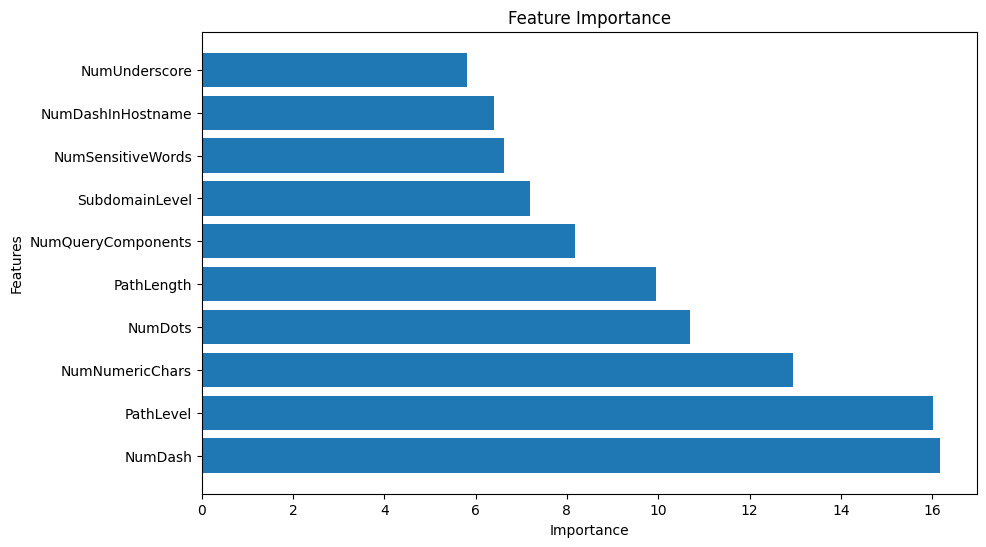

In [ ]:
# Check feature importance
feature_importanceT = model.get_feature_importance()
feature_namesT = xt_train.columns

# Create a DataFrame to display the feature names with their importance
importance_dfT = pd.DataFrame({
    'Feature': feature_namesT,
    'Importance': feature_importanceT
}).sort_values(by='Importance', ascending=False)

# Print top features
print(importance_dfT)

# Optionally plot the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_dfT['Feature'], importance_dfT['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

